# HW1 for MBML SF course, 1st semester.

Goal: to predict diabetes probability.

# Import библиотек.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler # Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder # Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder # Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline. Ни добавить, ни убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

# Набор данных

Набор данных представляет собой различные показатели здоровья людей и boolean значение диабета у них.

# Загружаем данные в pandas

Данные уже были предварительно очищены от дубликатов.

In [2]:
df = pd.read_csv("/home/synrocka/Study/diabetes_prediction/data/no_dup_diabetes_prediction_db", delimiter=',')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96146 entries, 0 to 96145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.6+ MB


# Работа с данными

Изменим тип колонок со значениями "0" и "1" на bool.

In [4]:
col_type_change_list = ['hypertension', 'heart_disease', 'diabetes']
for column in df.columns:
    if column in col_type_change_list:
        df[column] = df[column].astype(bool)

Посчитаем число категориальных и числовых колонок.

In [5]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if ((df[column_name].dtypes == object) or (df[column_name].dtypes == bool)):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))


categorical columns:	  ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes'] 
 len =  5
numerical columns:	  ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'] 
 len =  4


In [6]:
df[num_columns].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,27.321461,5.532609,138.218231
std,22.462948,6.767716,1.073232,40.909771
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.400000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.860000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


# Предварительная обработка числовых признаков.

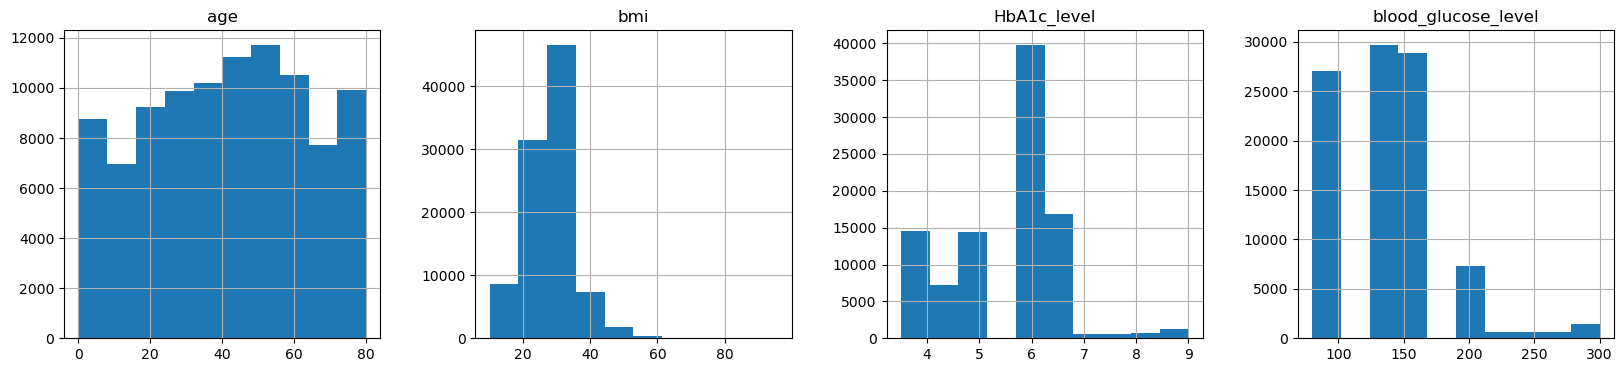

In [7]:
fig, axs = plt.subplots(1,4,figsize=(20,  4))

df.hist(column = num_columns, ax = axs );

# Стандартизация

## Первый шаг

In [8]:
scale = StandardScaler()

scale.fit(df[num_columns]);

In [9]:
scale.mean_, scale.scale_

(array([ 41.79432571,  27.32146111,   5.53260874, 138.21823061]),
 array([22.46283076,  6.76768037,  1.07322644, 40.90955861]))

## Шаг второй

In [10]:
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,age,bmi,HbA1c_level,blood_glucose_level
0,1.700840,-0.314947,0.994563,0.043554
1,0.543372,-0.000216,0.994563,-1.423096
2,-0.614096,-0.000216,0.155970,0.483549
3,-0.257952,-0.572051,-0.496269,0.410216
4,1.522768,-1.061141,-0.682623,0.410216
...,...,...,...,...
96141,-0.257952,-0.402126,-0.682623,0.165775
96142,-1.771563,-1.470439,0.901386,-0.934213
96143,1.077588,0.075142,0.155970,0.410216
96144,-0.792168,1.196649,-1.428039,-0.934213


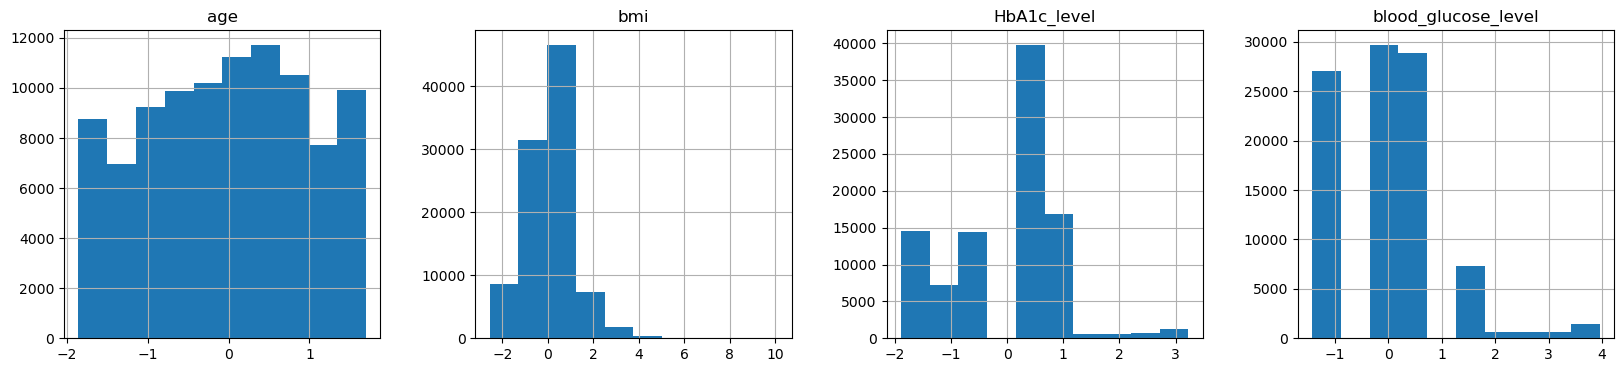

In [11]:
df_standard.hist(figsize = (20,4), layout= (1,4));

# Нормализация

## Первый шаг

In [12]:
norm = MinMaxScaler()

norm.fit(df[num_columns]);

In [13]:
norm.data_max_, norm.data_min_

(array([ 80.  ,  95.69,   9.  , 300.  ]), array([ 0.08, 10.01,  3.5 , 80.  ]))

## Шаг второй

In [14]:
normalized = norm.transform(df[num_columns])
df_norm = pd.DataFrame(normalized, columns=num_columns)
df_norm

,age,bmi,HbA1c_level,blood_glucose_level
0,1.000000,0.177171,0.563636,0.272727
1,0.674675,0.202031,0.563636,0.000000
2,0.349349,0.202031,0.400000,0.354545
3,0.449449,0.156863,0.272727,0.340909
4,0.949950,0.118231,0.236364,0.340909
...,...,...,...,...
96141,0.449449,0.170285,0.236364,0.295455
96142,0.024024,0.085901,0.545455,0.090909
96143,0.824825,0.207983,0.400000,0.340909
96144,0.299299,0.296569,0.090909,0.090909


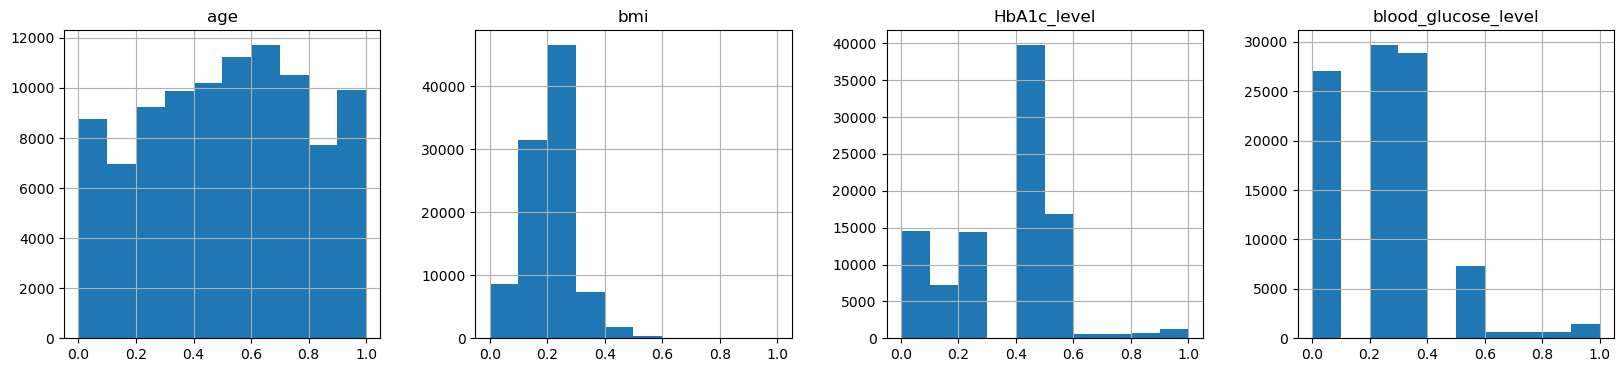

In [15]:
df_norm.hist(figsize = (20,4), layout= (1,4));

# Степенное преобразование

## Первый шаг

In [16]:
pt = PowerTransformer()

pt.fit(df[num_columns]);

In [17]:
pt.lambdas_

array([0.81270838, 0.09143396, 1.10649167, 0.11579827])

## Шаг второй

In [18]:
power = pt.transform(df[num_columns])
df_power = pd.DataFrame(power, columns=num_columns)
df_power

,age,bmi,HbA1c_level,blood_glucose_level
0,1.595045,-0.227014,0.995686,0.171996
1,0.569445,0.106204,0.995686,-1.677286
2,-0.555595,0.106204,0.147563,0.588713
3,-0.194564,-0.518027,-0.503814,0.522258
4,1.441836,-1.127786,-0.688479,0.522258
...,...,...,...,...
96141,-0.194564,-0.323668,-0.688479,0.292265
96142,-1.943598,-1.708877,0.900896,-0.955275
96143,1.052040,0.182601,0.147563,0.522258
96144,-0.742960,1.194515,-1.420145,-0.955275


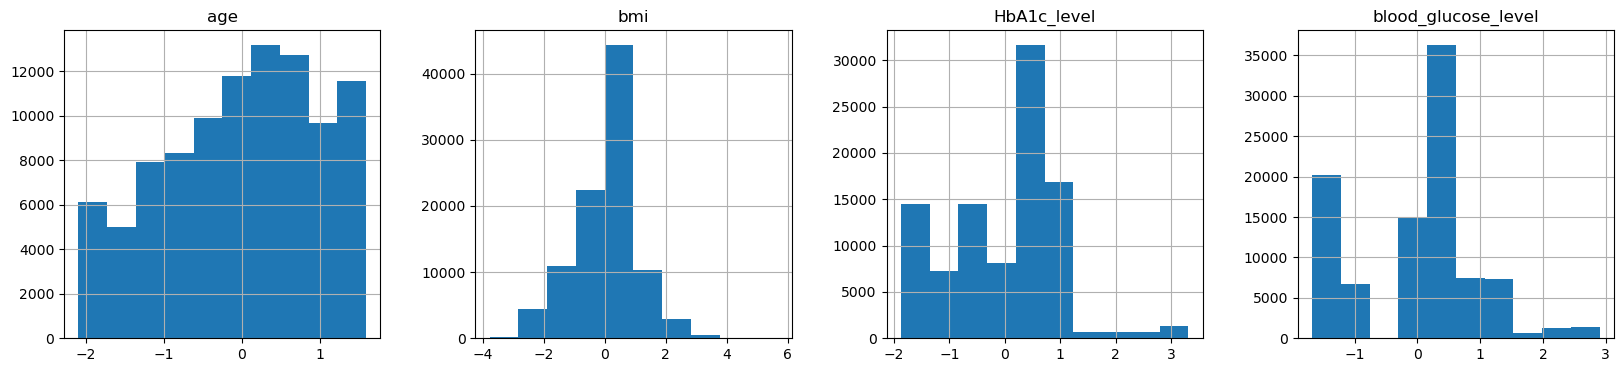

In [19]:
df_power.hist(figsize = (20,4), layout= (1,4));

# Создание класса для замены редких значений

In [20]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy


In [21]:
qr = QuantileReplacer(threshold=0.01, )

qr.fit(df[num_columns])

df_num_rare = qr.transform(df[num_columns])

In [23]:
df[num_columns].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,27.321461,5.532609,138.218231
std,22.462948,6.767716,1.073232,40.909771
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.400000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.860000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [22]:
df_num_rare.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.798798,27.619821,5.531252,138.078235
std,22.454764,6.744580,1.068967,40.386778
min,1.000000,14.550000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,30.120000,6.200000,159.000000
max,80.000000,48.971000,8.800000,280.000000


# Работа с категориальными признаками

## Порядковое кодирование

### Первый шаг

In [25]:
ordinal = OrdinalEncoder()

ordinal.fit(df[cat_columns]);

In [26]:
ordinal.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array([False,  True]),
 array([False,  True]),
 array(['No Info', 'current', 'ever', 'former', 'never', 'not current'],
       dtype=object),
 array([False,  True])]

### Шаг второй

In [28]:
ordinal_encoded = ordinal.transform(df[cat_columns])

df_ordinal = pd.DataFrame(ordinal_encoded, columns=cat_columns)
df_ordinal

,gender,hypertension,heart_disease,smoking_history,diabetes
0,0.0,0.0,1.0,4.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,4.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...
96141,0.0,0.0,0.0,0.0,0.0
96142,0.0,0.0,0.0,0.0,0.0
96143,1.0,0.0,0.0,3.0,0.0
96144,0.0,0.0,0.0,4.0,0.0
